In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv
/kaggle/input/geographic-data-of-indian-cities/IND_cities_geo_data.csv


**We would be looking into City_day file only for now**

In [2]:
import pandas as pd
df = pd.read_csv('../input/air-quality-data-in-india/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


**There's a lot of missing data, should deal with it**

In [5]:
cols = df.columns
cols

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
cols_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

In [7]:
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

In [8]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [9]:
df['Air_Quality'] = df['AQI_Bucket'].fillna('Moderate')
df.drop('AQI_Bucket',axis=1,inplace =True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   Date         29531 non-null  object 
 2   PM2.5        29531 non-null  float64
 3   PM10         29531 non-null  float64
 4   NO           29531 non-null  float64
 5   NO2          29531 non-null  float64
 6   NOx          29531 non-null  float64
 7   NH3          29531 non-null  float64
 8   CO           29531 non-null  float64
 9   SO2          29531 non-null  float64
 10  O3           29531 non-null  float64
 11  Benzene      29531 non-null  float64
 12  Toluene      29531 non-null  float64
 13  Xylene       29531 non-null  float64
 14  AQI          29531 non-null  float64
 15  Air_Quality  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [11]:
city_wise_AQI = df[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()

In [12]:
city_wise_AQI.head()

,City,AQI
0,Aizawl,24.0
1,Thiruvananthapuram,69.0
2,Shillong,69.5
3,Coimbatore,77.5
4,Chandigarh,83.0


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

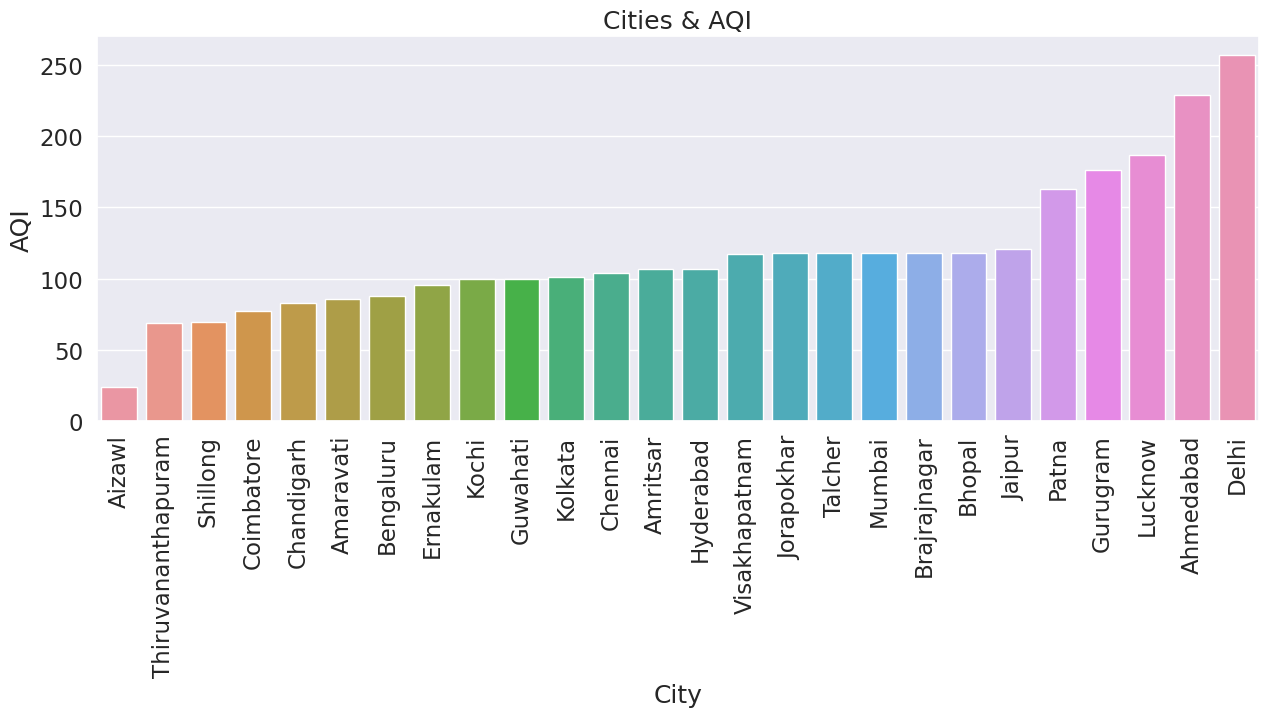

In [14]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=city_wise_AQI).set(title ='Cities & AQI')
plt.xticks(rotation=90)
plt.show()

**On Average, Aizwal has been the city with the best AQI and Delhi, Ahmedabad, Lucknow have very poor AQ-indices.**

In [15]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] =df['Date'].dt.month
df.drop('Date',axis=1,inplace=True)

In [16]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

In [17]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_Quality,year,month
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,2015,1
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,2015,1
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate,2015,1
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate,2015,1
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate,2015,1


In [18]:
x1 = df[['City','AQI','year']].groupby(['City','year']).median().sort_values(['AQI']).reset_index()


In [19]:
x1.head()

,City,year,AQI
0,Aizawl,2020,24.0
1,Amaravati,2020,54.0
2,Thiruvananthapuram,2020,64.0
3,Shillong,2020,65.0
4,Thiruvananthapuram,2017,68.0


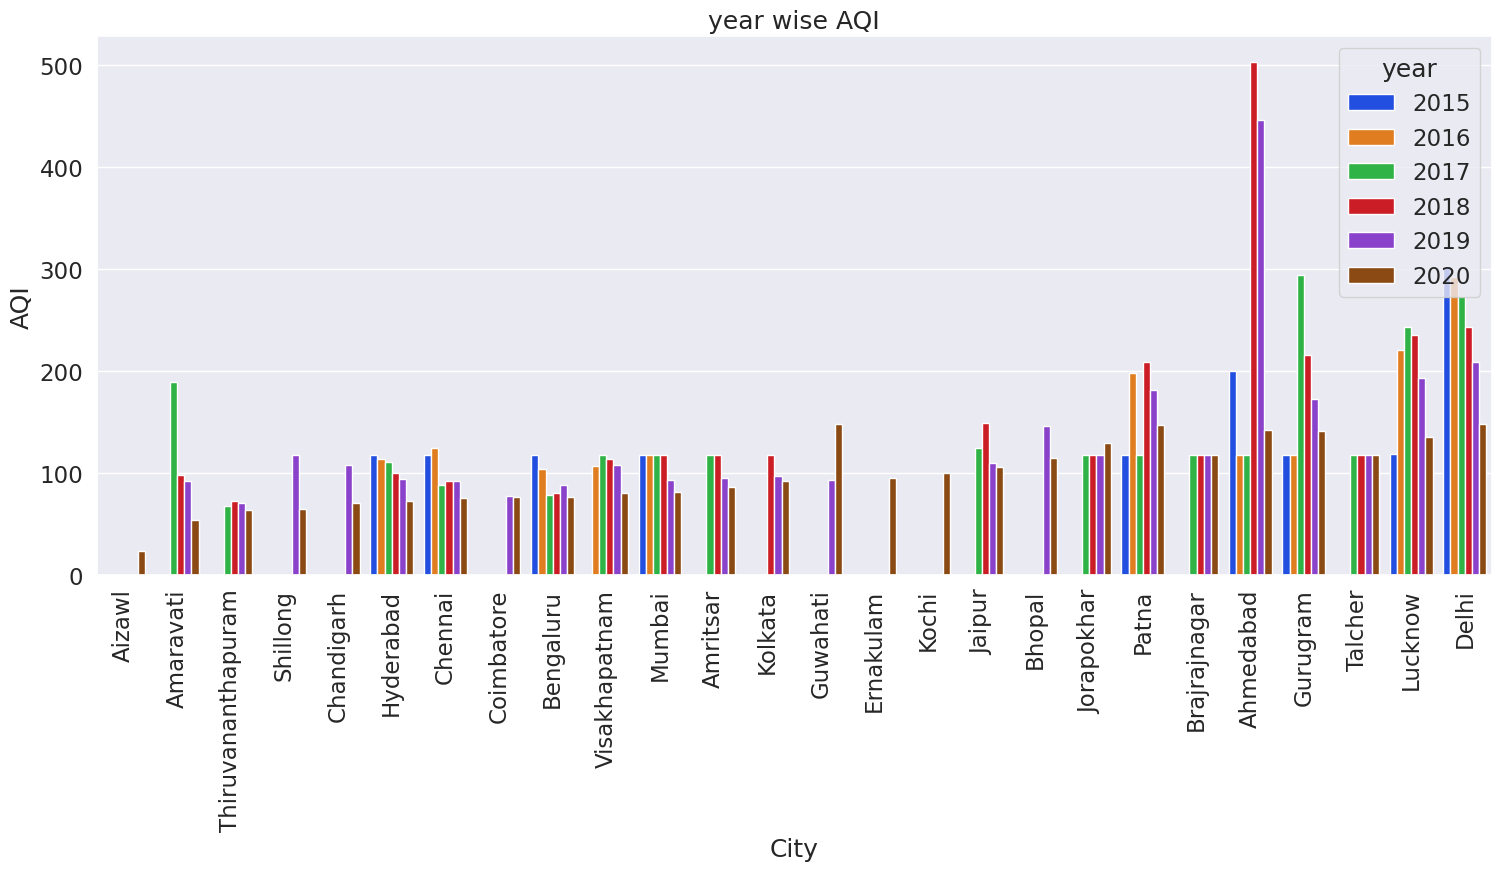

In [20]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=x1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()


**The plot shows a huge spike in the AQI for the city of Ahmedabad during the years 2018 & 2019.**

**Majority of this is coming from Power plant exhaust, Road dust and transport.**

link to the relevant news article: (https://timesofindia.indiatimes.com/city/ahmedabad/posh-bopal/articleshow/72046417.cms)**

In [21]:
df.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_Quality,year,month
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,2015,1
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,2015,1


In [22]:
month_wise = df.groupby(['City','month']).agg(
    #month = pd.NamedAgg(column='month',aggfunc = max),
    AQI = pd.NamedAgg(column = 'AQI',aggfunc = np.mean))
month_wise.reset_index(inplace = True)

In [23]:
month_wise.head()

,City,month,AQI
0,Ahmedabad,1,346.172043
1,Ahmedabad,2,447.894118
2,Ahmedabad,3,380.129032
3,Ahmedabad,4,295.305556
4,Ahmedabad,5,216.392473


In [24]:
df[df['City']=='Ahmedabad'].sort_values('AQI',ascending=False).head()[['City','AQI']]

,City,AQI
1145,Ahmedabad,2049.0
1136,Ahmedabad,1917.0
560,Ahmedabad,1842.0
1048,Ahmedabad,1747.0
1463,Ahmedabad,1719.0


**The AQI for Ahmedabad is fishy, AQI anywhere more than 500 means that things are pretty much worse.(Could be a mistake).**

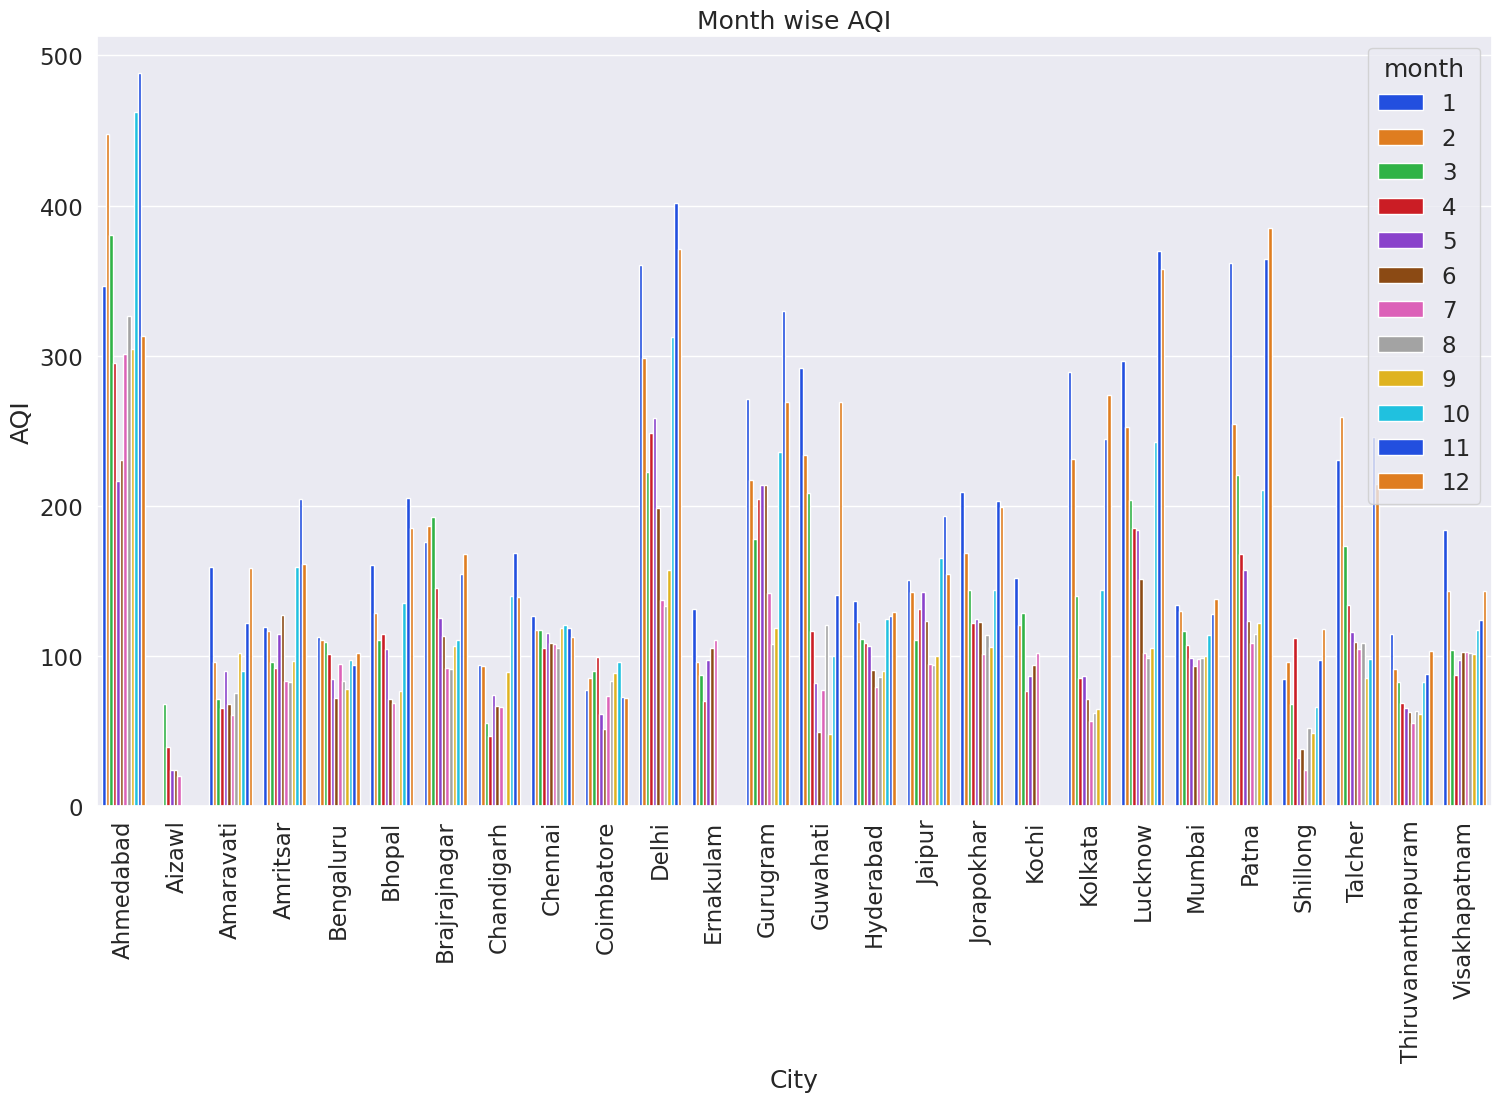

In [25]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=month_wise,hue='month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()

**Tha AQI among most cities spiked on Nov, Dec, Jan & Feb months, Could be an indicator of how the way of celebrating certain festivals(which fall during or close to these months) effect the environment around us.**

# It would be cool to make some plots on the map to better visualize the AQI in different parts of the country.


**We import a dataset that I have created containing the latitude and longitude data of cities in India**

In [26]:
df1 = pd.read_csv('../input/geographic-data-of-indian-cities/IND_cities_geo_data.csv')

In [27]:
df1.head()

,city,latitude,longitude,country
0,Abohar,30.1204,74.2900,India
1,Addanki,15.8110,79.9738,India
2,Adilabad,19.6667,78.5333,India
3,adoni,15.6300,77.2800,India
4,Agartala,23.8333,91.2667,India


In [28]:
df_new = pd.merge(df, df1, how = 'left', left_on = 'City',right_on = 'city')

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29530
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   PM2.5        29531 non-null  float64
 2   PM10         29531 non-null  float64
 3   NO           29531 non-null  float64
 4   NO2          29531 non-null  float64
 5   NOx          29531 non-null  float64
 6   NH3          29531 non-null  float64
 7   CO           29531 non-null  float64
 8   SO2          29531 non-null  float64
 9   O3           29531 non-null  float64
 10  Benzene      29531 non-null  float64
 11  Toluene      29531 non-null  float64
 12  Xylene       29531 non-null  float64
 13  AQI          29531 non-null  float64
 14  Air_Quality  29531 non-null  object 
 15  year         29531 non-null  int64  
 16  month        29531 non-null  int64  
 17  city         29531 non-null  object 
 18  latitude     29531 non-null  float64
 19  long

In [30]:
C1 = df_new['City'].unique()
C2 = df_new['city'].unique()

**checking if there are any cities that are missing in either of the Dateframe(Have corrected it while editing the dataset, so there wont be any missing data)**

In [31]:
missing = []
for i in C1:
    if i not in C2:
        missing.append(i)

In [32]:
missing

[]

In [33]:
geo_data = df_new.groupby('City').agg(
air_quality = pd.NamedAgg('Air_Quality',pd.Series.mode),
aqi = pd.NamedAgg('AQI',np.mean),
lat = pd.NamedAgg('latitude',max),
lng = pd.NamedAgg('longitude',max)
).reset_index()

In [34]:
geo_data.head()

,City,air_quality,aqi,lat,lng
0,Ahmedabad,Moderate,339.861623,23.0300,72.580
1,Aizawl,Good,36.238938,23.7104,92.720
2,Amaravati,Satisfactory,97.925342,20.9333,77.750
3,Amritsar,Moderate,119.771499,31.6167,74.850
4,Bengaluru,Satisfactory,95.485316,12.9699,77.598


**We will just plot the lats and lngs and seperate them using 'AQI' on empty grid**

<AxesSubplot:xlabel='lng', ylabel='lat'>

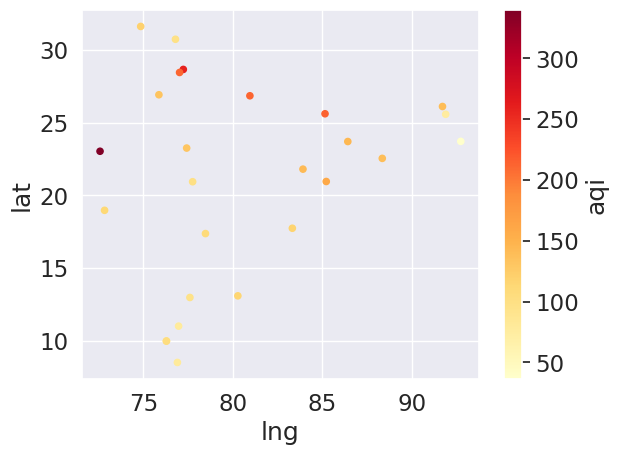

In [35]:
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd')

**Import geographical shapefile data from geopandas**

In [36]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

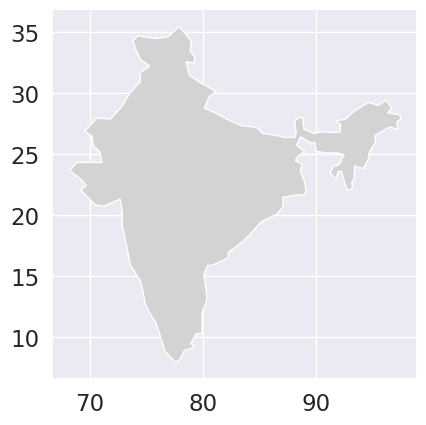

In [37]:
countries[countries['name']=='India'].plot(color='lightgrey')

**Now we can plot both the Country shapefile and the lats and lngs data of cities that we have plotted earlier on the same axes.**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


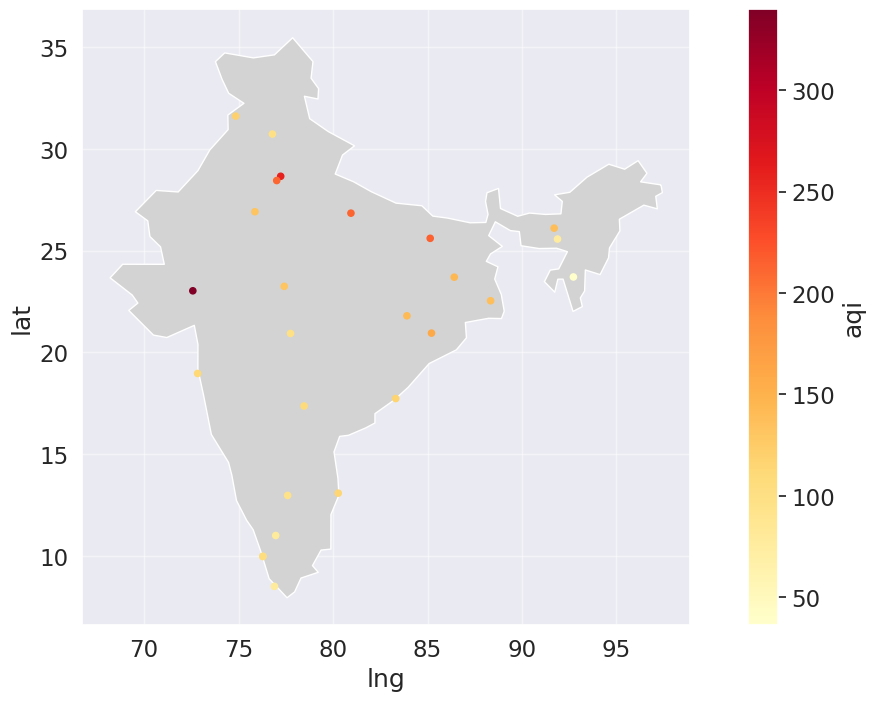

In [38]:
fig,ax = plt.subplots(figsize = (15,8))
countries[countries['name']=='India'].plot(color='lightgrey',ax=ax)
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd',ax=ax)
ax.grid(b=True,alpha=0.5)
plt.show()

**Add Annotations for the data points for better visualization**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  import sys


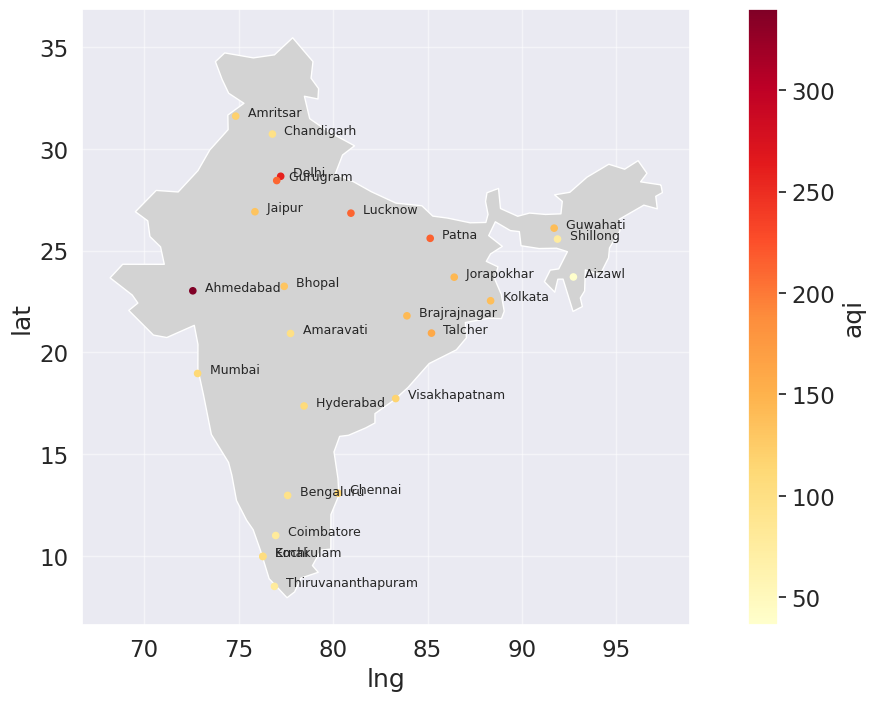

In [39]:
fig,ax = plt.subplots(figsize = (15,8))
countries[countries['name']=='India'].plot(color='lightgrey',ax=ax)
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd',ax=ax)

for idx, row in geo_data.iterrows():
    ax.annotate(str('   '+row['City']), (row['lng'], row['lat']),size=9 )
ax.grid(b=True,alpha=0.5)
plt.show()

# EDA End